In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Define Data

This data is generated to loosely satisfy the assumptions held by the OLS method.
- Linearity in connection
- Normality of Error Distribution
- Constant Variance
- Minimal Outliers

In [17]:
# Sample Size
n_samples = 500

# Define the Independent Variable/Feature
low, high = 0, 20
X = np.random.uniform(low=low, high=high, size=n_samples)

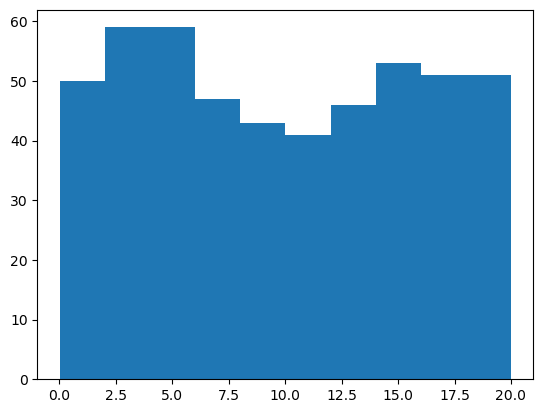

In [31]:
plt.hist(X);

In [28]:
# Define the Dependent Variable/Outcome
distribution_mean, distribution_std = 0, 2.5
Y = 2*X + np.random.normal(loc=distribution_mean, scale=distribution_std, size=n_samples)

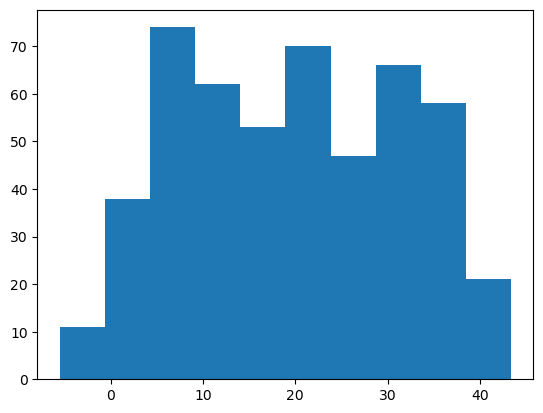

In [33]:
plt.hist(Y);

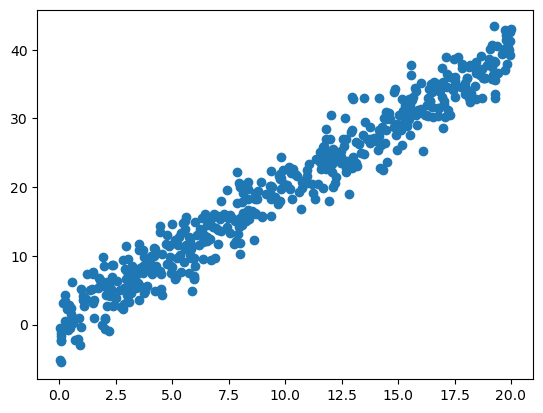

In [34]:
plt.scatter(X, Y);

### OLS from Scratch
Proof I used to understand the concept can be found in this link: https://statproofbook.github.io/P/slr-ols.html

In [50]:
def get_ols_line_plot(x: np.array, y:np.array) -> None:
    """ This function inputs a single predictor and outcome pair to produce an OLS line. Finally,
     a plot is generated where the OLS line is laid over the scatter plot. 
    
    :param x: Predictor
    :param y: Outcome
    :return: None
    """
    x_mean = x.mean()
    y_mean = y.mean()
    
    error_in_x = x - x_mean
    error_in_y = y - y_mean
    
    m = (error_in_x * error_in_y).sum()/((error_in_x)**2).sum()
    c = y_mean - m * x_mean
    
    fit = m*x + c
    
    plt.scatter(x,y)
    plt.plot(x, fit, color="red")
    plt.title(f"Regression line using OLS || m={m} & c={c}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.show()

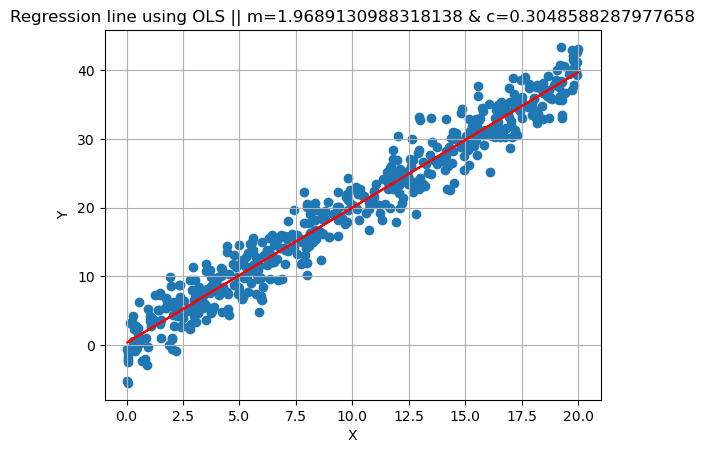

In [51]:
get_ols_line_plot(X, Y)

### Utilizing Python Packages: Statsmodels

statsmodels.sm.OLS seems to contain the relevant functionality to produce an OLS regression line 
given X and Y. 

In [42]:
import statsmodels.api as sm

In [43]:
model = sm.OLS(Y, X)

In [52]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          3.960e+04
Date:                Wed, 31 Jul 2024   Prob (F-statistic):                        0.00
Time:                        13:56:51   Log-Likelihood:                         -1181.0
No. Observations:                 500   AIC:                                      2364.
Df Residuals:                     499   BIC:                                      2368.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9917      0.010    198.993      0.000       1.972       2.011
==============================================================================
Omnibus:                        0.153   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.926   Jarque-Bera (JB):                0.254
Skew:                          -0.020   Prob(JB):                        0.881
Kurtosis:                       2.898   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
results.params

array([1.99168028])

In [54]:
results.rsquared

0.9875552626526748